In [ ]:
import pandas as pd
import re
import sklearn
import numpy as np 
import time
import nltk
nltk.download('stopwords')
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Amazon_Test.csv",engine='python').iloc[:28000,:]

In [ ]:
print("Total sample is {}".format(data.shape))

Total sample is (28000, 2)


In [ ]:
data.head()

,Column1,Column2
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [ ]:
review=data["Column1"].value_counts()

In [ ]:
data.head()

,Column1,Column2
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [ ]:
review

__label__2     14219
__label__1     13781
Name: Column1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


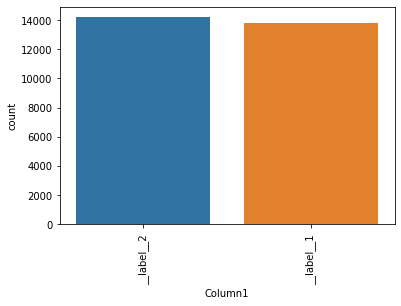

In [ ]:
sb.countplot("Column1",data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def text_cleaning(data):
    corpus=[]
    for i in range(0,len(data)):
        process_data=re.sub(r'\W',' ',str(data[i]))
        process_data=process_data.lower()
        process_data=re.sub(r'\d+'," ",process_data)
        process_data=re.sub(r"[^a-zA-Z]",' ',process_data)
        process_data=re.sub(r'\s+',' ',process_data)
        corpus.append(process_data)
    return corpus

In [ ]:
corpus=text_cleaning(data["Column2"])

In [ ]:
tf_vector=TfidfVectorizer(max_features=len(corpus),ngram_range=(1,2),min_df=1,max_df=.8,stop_words=stopwords.words('english'))

In [ ]:
tf_vector

TfidfVectorizer(max_df=0.8, max_features=28000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [ ]:
tf_vector_matrix=tf_vector.fit_transform(corpus)


In [ ]:
tf_vector_matrix

<28000x28000 sparse matrix of type '<class 'numpy.float64'>'
	with 1416182 stored elements in Compressed Sparse Row format>

In [ ]:
tf_vector_matrix.todense()
tf_vector_matrix

<28000x28000 sparse matrix of type '<class 'numpy.float64'>'
	with 1416182 stored elements in Compressed Sparse Row format>

In [ ]:
tf_name=tf_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_feature=tf_vector_matrix
y_target=data["Column1"]

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_feature,y_target,test_size=.30,random_state=101)

In [ ]:
#KNN

In [ ]:
s1=time.time()
KnnModel=KNeighborsClassifier().fit(Xtrain,Ytrain)
s2=time.time()
knn_tt=s2-s1
print(f"time taken by knn is {knn_tt}")

time taken by knn is 0.03613877296447754


In [ ]:
Ya=Ytest
s1=time.time()
Yp=KnnModel.predict(Xtest)
s2=time.time()
knn_ts=s2-s1
print(f"time taken by knn testing is {knn_ts}")

time taken by knn testing is 8.228373050689697


In [ ]:
acc_knn=accuracy_score(Ya,Yp)*100

In [ ]:
print(f'accucracy of KNN is {acc_knn}')
print(f'\nconfusion matrix KNN \n{confusion_matrix(Ya,Yp)}')
print(f'\nclassification report KNN\n {classification_report(Ya,Yp)}')

accucracy of KNN is 70.33333333333334

confusion matrix KNN 
[[2750 1345]
 [1147 3158]]

classification report KNN
               precision    recall  f1-score   support

 __label__1        0.71      0.67      0.69      4095
 __label__2        0.70      0.73      0.72      4305

    accuracy                           0.70      8400
   macro avg       0.70      0.70      0.70      8400
weighted avg       0.70      0.70      0.70      8400



In [ ]:
#LogisticRegression

In [ ]:
s1=time.time()
LRModel=LogisticRegression().fit(Xtrain,Ytrain)
s2=time.time()
lr_tt=s2-s1
print(f"time taken by lr  is {lr_tt}")

time taken by lr  is 0.7077047824859619


In [ ]:
Ya=Ytest
s1=time.time()
Yp=LRModel.predict(Xtest)
s2=time.time()
lr_ts=s2-s1
print(f"time taken by lr testing is {lr_ts}")

time taken by lr testing is 0.007616996765136719


In [ ]:
acc_lr=accuracy_score(Ya,Yp)*100

In [ ]:
print(f'accucracy of LR is {acc_lr}')
print(f'\nconfusion matrix LR \n{confusion_matrix(Ya,Yp)}')
print(f'\nclassification report LR\n {classification_report(Ya,Yp)}')

accucracy of LR is 87.10714285714286

confusion matrix LR 
[[3537  558]
 [ 525 3780]]

classification report LR
               precision    recall  f1-score   support

 __label__1        0.87      0.86      0.87      4095
 __label__2        0.87      0.88      0.87      4305

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.87      0.87      0.87      8400



In [ ]:
#NaiveBayes

In [ ]:
s1=time.time()
NBModel=MultinomialNB().fit(Xtrain,Ytrain)
s2=time.time()
NB_tt=s2-s1
print(f"time taken by NB  is {NB_tt}")

time taken by NB  is 0.08815646171569824


In [ ]:
Ya=Ytest
s1=time.time()
Yp=NBModel.predict(Xtest)
s2=time.time()
NB_ts=s2-s1
print(f"time taken by NB testing is {NB_ts}")

time taken by NB testing is 0.0065784454345703125


In [ ]:
acc_NB=accuracy_score(Ya,Yp)*100

In [ ]:
print(f'accucracy of NB is {acc_NB}')
print(f'\nconfusion matrix NB \n{confusion_matrix(Ya,Yp)}')
print(f'\nclassification report NB\n {classification_report(Ya,Yp)}')

accucracy of NB is 85.47619047619047

confusion matrix NB 
[[3460  635]
 [ 585 3720]]

classification report NB
               precision    recall  f1-score   support

 __label__1        0.86      0.84      0.85      4095
 __label__2        0.85      0.86      0.86      4305

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



In [ ]:
#DecisionTree

In [ ]:
s1=time.time()
DTModel=DecisionTreeClassifier().fit(Xtrain,Ytrain)
s2=time.time()
DT_tt=s2-s1
print(f"time taken by DT  is {DT_tt}")

time taken by DT  is 16.61818838119507


In [ ]:
Ya=Ytest
s1=time.time()
Yp=DTModel.predict(Xtest)
s2=time.time()
DT_ts=s2-s1
print(f"time taken by DT testing is {DT_ts}")

time taken by DT testing is 0.02607440948486328


In [ ]:
acc_DT=accuracy_score(Ya,Yp)*100

In [ ]:
print(f'accucracy of DT is {acc_DT}')
print(f'\nconfusion matrix DT \n{confusion_matrix(Ya,Yp)}')
print(f'\nclassification report DT\n {classification_report(Ya,Yp)}')

accucracy of DT is 72.72619047619048

confusion matrix DT 
[[2963 1132]
 [1159 3146]]

classification report DT
               precision    recall  f1-score   support

 __label__1        0.72      0.72      0.72      4095
 __label__2        0.74      0.73      0.73      4305

    accuracy                           0.73      8400
   macro avg       0.73      0.73      0.73      8400
weighted avg       0.73      0.73      0.73      8400



In [ ]:
tt_time=[knn_tt,lr_tt,NB_tt,DT_tt]
ts_time=[knn_ts,lr_ts,NB_ts,DT_ts]
acc_model=[acc_knn,acc_lr,acc_NB,acc_DT]
model_name=['KNN','LR','NB','DT']

In [ ]:
table=pd.DataFrame({'TrainTime':tt_time,'TestingTime':ts_time,'Acc':acc_model},index=model_name)

In [ ]:
table

,TrainTime,TestingTime,Acc
KNN,0.036139,8.228373,70.333333
LR,0.707705,0.007617,87.107143
NB,0.088156,0.006578,85.476190
DT,16.618188,0.026074,72.726190


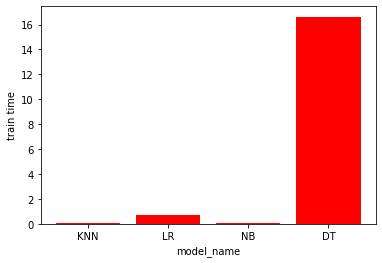

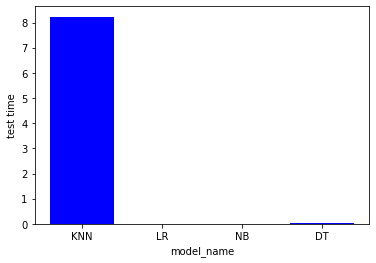

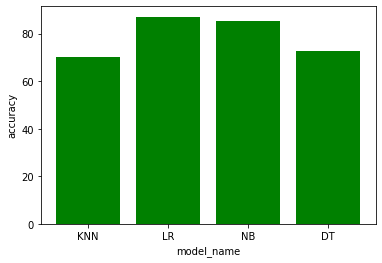

In [ ]:
plt.bar(model_name,tt_time,label='training time',color=['red'])
plt.ylabel('train time')
plt.xlabel('model_name')
plt.show()
plt.bar(model_name,ts_time,label='testing time',color=['blue'])
plt.ylabel('test time')
plt.xlabel('model_name')
plt.show()
plt.bar(model_name,acc_model,label='accuracy',color=['green'])
plt.ylabel('accuracy')
plt.xlabel('model_name')
plt.show()

In [ ]:
# joblib.dump(NBModel,'Model.pkl')
# joblib.dump(tf_vector,'tfvector.pkl')

['Model.pkl']